In [133]:
#Data Preprocessing
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

#Read the data
data = pd.read_csv('spam.tsv', sep='\t')
#Display the first 5 rows
data.head(5)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [134]:
#Display any missing values (True==1 or False==0)
data.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [135]:
#Get the overal statistical analysis
data.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [136]:
#Get the total amount of Spam/Ham records
data['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [137]:
#Create buckets for spam/ham
ham = data[data['label'] == 'ham']
spam = data[data['label'] == 'spam']

print(ham.shape)
print(spam.shape)

(4825, 4)
(747, 4)


In [138]:
#Resample ham to balance the dataset
ham = ham.sample(spam.shape[0])

print(ham.shape)

(747, 4)


In [139]:
balanced_data = ham.append(spam, ignore_index=True)

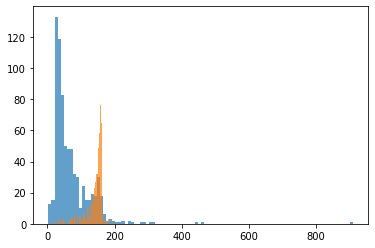

'the lengthier the message, the more probabilities of it to be a spam'

In [140]:
#Plot ham/spam messages regarding their lenght
plt.hist(balanced_data[balanced_data['label'] == 'ham']['length'], bins=100, alpha=0.7)
plt.hist(balanced_data[balanced_data['label'] == 'spam']['length'], bins=100, alpha=0.7)

plt.show()

'''the lengthier the message, the more probabilities of it to be a spam'''

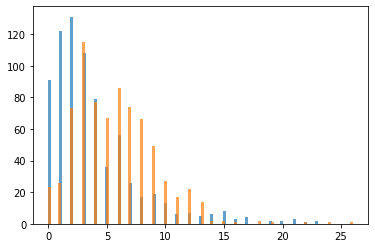

"punctuation doesn't really affect the ham/spam classification"

In [141]:
#Plot ham/spam messages regarding their lenght
plt.hist(balanced_data[balanced_data['label'] == 'ham']['punct'], bins=100, alpha=0.7)
plt.hist(balanced_data[balanced_data['label'] == 'spam']['punct'], bins=100, alpha=0.7)

plt.show()

'''punctuation doesn't really affect the ham/spam classification'''

In [142]:
#Split the data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3, random_state=0, shuffle=True)

print(X_train.shape)
print(X_test.shape)

(3900,)
(1672,)


In [165]:
#Text vectorization using the TF-IDF method (Term Frequency-Inverse Document Frequency)
#Train a Random Forest Classifier

#Create a pipeline object
classifier = Pipeline([("tfidf", TfidfVectorizer()), ("rfc", RandomForestClassifier(n_estimators=100))])

#Train the data
classifier.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [166]:
#Evaluate the data
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)
print()
cf = confusion_matrix(y_test, y_pred)
print(cf)
print()
cl_report = classification_report(y_test, y_pred)
print(cl_report)

97.54784688995215

[[1451    0]
 [  41  180]]

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1451
        spam       1.00      0.81      0.90       221

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672



In [167]:
#Train an SVM Classifier
svm = Pipeline([("tfidf", TfidfVectorizer()), ("svm", SVC(C=100, kernel='linear'))]) #kernel='linear, gamma='scale' give the best results
svm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svm',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', deg

In [168]:
#Run predictions
y_pred = svm.predict(X_test)

#Evaluate the SVM 
acc = accuracy_score(y_test, y_pred)
print(acc*100)
print()
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
print()
class_report = classification_report(y_test, y_pred)
print(class_report)

98.98325358851675

[[1448    3]
 [  14  207]]

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1451
        spam       0.99      0.94      0.96       221

    accuracy                           0.99      1672
   macro avg       0.99      0.97      0.98      1672
weighted avg       0.99      0.99      0.99      1672



In [169]:
#Test the models
test1 = ["This is a test case for two, different machine learning models"]
test2 = ["This is a very exciting and educational project!"]
test3 = ["Congratulations!! You just won 1 million dollars! To claim it please call back to 4768548"]

In [171]:
#Test RF Classifier
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [172]:
#Test SVM Classifier
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
